<h1 style="color:#900C3F;font:luminary;text-align:center;"><i>We know the Krouts are biased. Right? ... Right? </i></h1>
    
<h2 style="color:#900C3F;text-align:center;"> Predicting which applicants at german bank(s?) were considered to be high or low risk in a historical dataset - December 16, 2022 </h2>


<h1 style="color:#900C3F;">Task at hand</h1> 

### Using several data science methods detailed below, we will see if we can accurately predict german bank risk analysis for previous applicants
#### Data Science Methods include:
- splitting model into appropriate groups when recognizing their existence
- classification modeling
- feature engineering when patterns can be determined 

<h1 style="color:#900C3F;">Project Goal</h1> 

### Professor Dr. Hans Hofmann released a dataset with 1000 historical applicants for loans from german banks or perhaps from one german bank. His write up did not disambiguate this. His intention was for this dataset to be used to use 'algorithms' to predict whether those previous applicants would be given a high or low risk classification. As a low risk loan applicant, a bank will offer lower rates on loans than they would to a high risk applicant. 

<h1 style="color:#900C3F;">Plan of action</h1>

### Aqcuire and prepare
1. Acquire German Credit data from a public kaggle account. Transform the data to a Pandas dataframe for manipulating using Jupyter Notebook.
2. Prepare the data for exploration and analysis. Find out if there are some values missing and find a way to handle those missing values.
3. Change the data types if needed
4. Find if there are features which can be created to simplify the exploration process.
5. Determine which observations are outliers and handle them.
6. Create a data dictionary.
7. Split the data into 3 data sets: train, validate and test data (56%, 24%, and 20% respectively)

### Explore and pre-process
1. Explore the train data set through visualizations and statistical tests. 
2. Determine which variables have statistically significant relationships with zestimates errors. 
2. Make the exploration summary and document the main takeaways.
3. Impute the missing values if needed.
4. Pick the features which can help to build a good prediction model.
5. Identify if new features must be created to improve the model's accuracy.
6. Encode the categorical variables.
7. Split dataframe into segments if those segments represent different populations.
8. Split the target variable from the data sets.


### Explore modify or create add features for model
1. Create categories from integer variables which may have too many unique numbers for classification model.
2. Determine if new features are statistically significant

### Build a classification model
1. Pick from several classification algorithms to create prediction models.
2. Create the models and evaluate regressors using Accuracy and F-1 scores on the train data set.
3. Evaluate algorithms using train and validate sets, compared to one another.
3. Determine which algorithms produced best results
5. Make predictions for the test data set.
6. Evaluate the results.

### Report results from models built

### Draw conclusions

<h1 style="color:#900C3F;">Data Dictionary</h1>


| Feature | Definition | Manipulations applied|Data Type|
|--------|-----------|-----------|-----------|
||
|||**Categorical Data**
||
|*Sex*| Identifies whether the applicant is male or female  | Male or Female | category (boolean)
|*Job*| Identifies the work stability, status of the applicant  | 4 categories: unemployed/unskilled nonresident, unskilled resident, skilled employee, management/highly qualified employee | category
|*Housing*| Identifies the applicant's living arrangements  | 3 categories: rent, own, 'for free' | category
|*Saving Accounts*| How much has the applicant saved in M2 or higher accounts | 4 categories: Little,  Moderate, Rich, Quite Rich,| category
|*Checking Account*| How much M1 money does the applicant have  | 3 categories: Little, Moderate, Rich | category
|*Purpose*| Identifies the purpose of the loan  | 11 categories: car(new), car(used), furniture, tv, home appliance, repairs, education, retraining, business, other, vacation | category
||
|||**Numerical Data**
||
|*Age*|  Age of the Applicants | Applicants range from 19 to 75 years old | integer
|*Credit Amount*|  How much credit has been extended to applicant | ranges from 250 to 18424| integer
|*Duration*|  The duration of loan sought | in months ranging from 4 to 72 | integer
||
|||**Target Data**
||
|**Risk** | **Did a German bank consider the loan to be high or low risk** | **High or Low** | **Category**

In [71]:
import pandas as pd
import numpy as np

from scipy.stats import spearmanr, pearsonr, f_oneway, chi2_contingency

# custom modules for this project
import src.german_credit_acquire as gca
import src.german_evaluate as ge
import src.german_modelling as gm

from importlib import reload

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

In [53]:
train, _,__ = gca.get_german_credit()
df = gca.acquire_german_credit()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 688 to 548
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   560 non-null    int64   
 1   job                   560 non-null    category
 2   housing               560 non-null    category
 3   saving accounts       560 non-null    category
 4   checking account      560 non-null    category
 5   credit amount         560 non-null    int64   
 6   purpose               560 non-null    category
 7   risk                  560 non-null    int64   
 8   age_groups            560 non-null    category
 9   loan_duration_groups  560 non-null    category
dtypes: category(7), int64(3)
memory usage: 22.8 KB


<h1 style="color:#900C3F;">Data Exploration</h1>

### Let us begin with trying to find different populations among our non-categorical variables such as Age

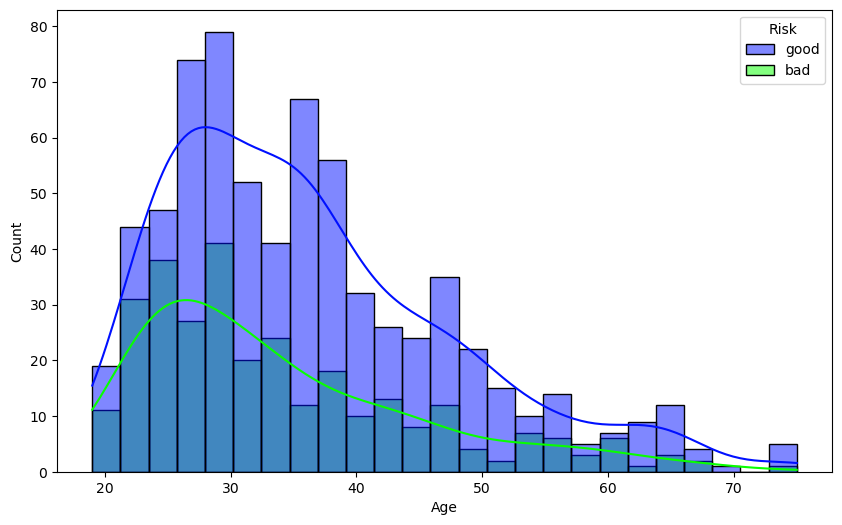

In [58]:
ge.age_distribution(df)

### We see that there is not an even distribution between ages and the effective credit risk the bank sees from applicants.

### I will break these ages into categories for further analysis

#### The minimum and maximum of the age category 
#### Then the quantile proportions of the applicants in the sample: the 25%, 50%, and 80th% quantiles

In [60]:
print((df['Age'].min(), df['Age'].max()))
print((df['Age'].quantile(.25), df['Age'].quantile(.5),round(df['Age'].quantile(.8),0)))

(19, 75)
(27.0, 33.0, 45.0)


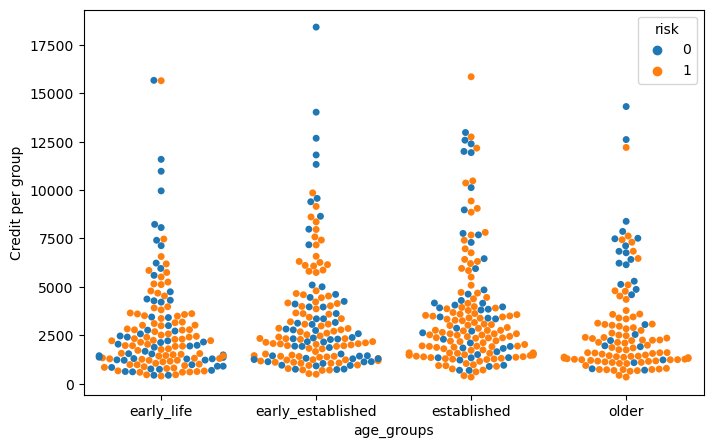

In [63]:
ge.age_group_risk(train)

### We see that the age categories appear to consolidate more and more 'good credit' as the loan applicant gets more established

## I want to glance at all the variables to show their inconsistency

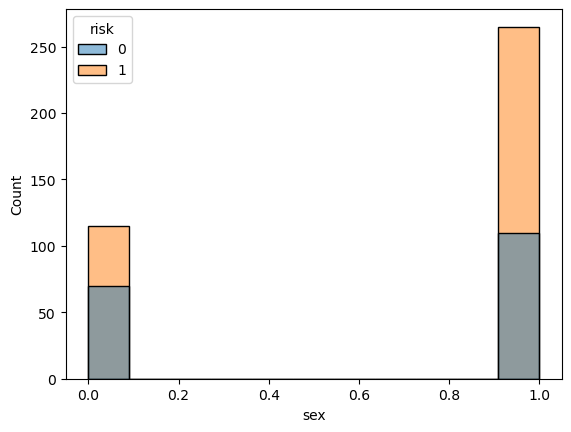

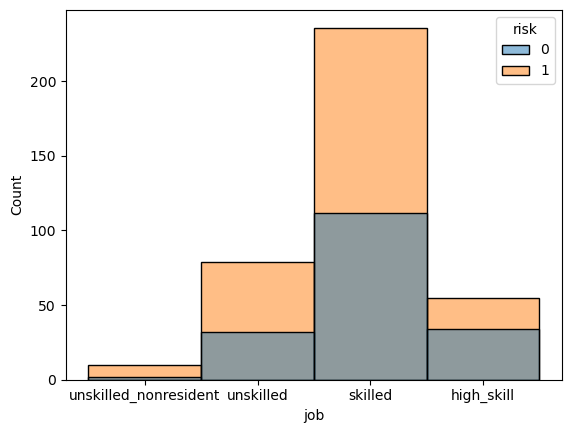

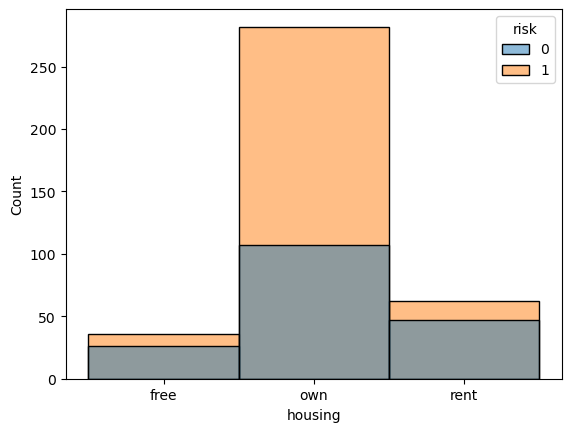

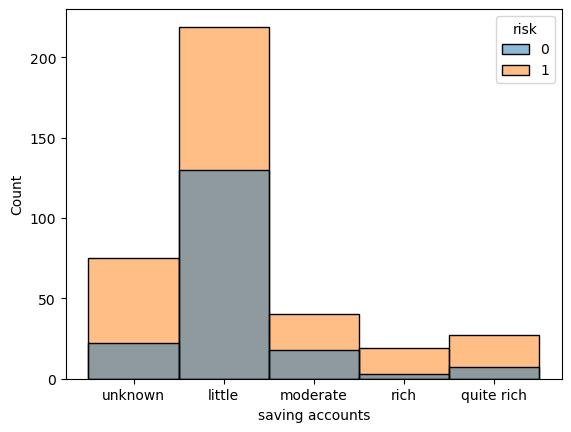

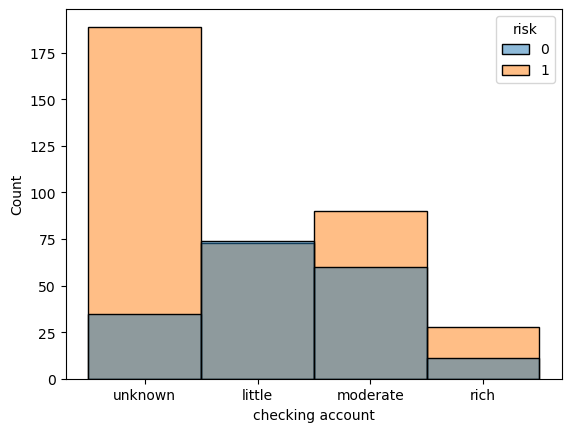

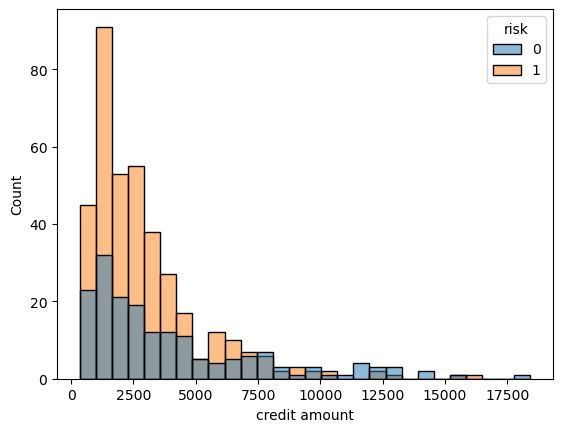

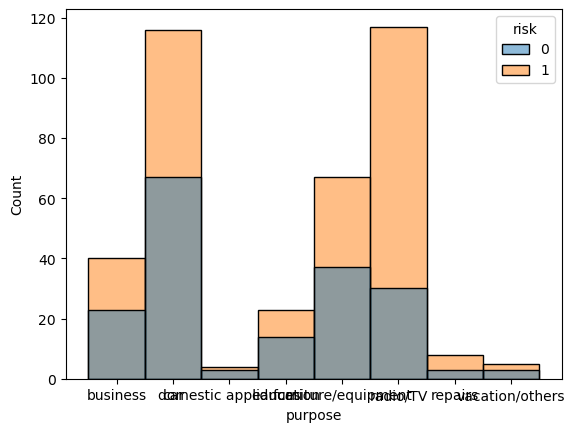

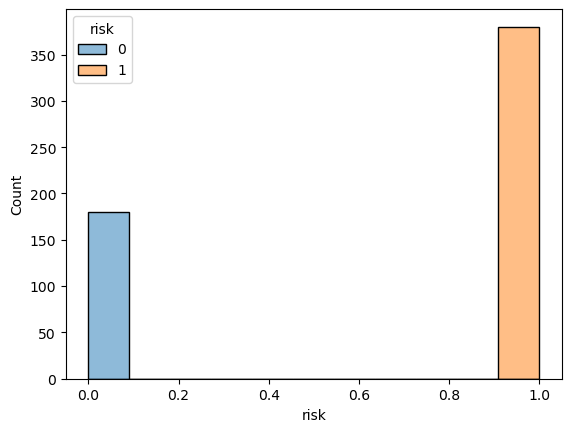

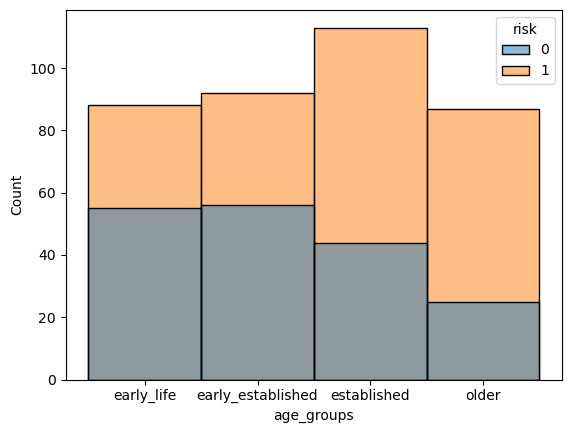

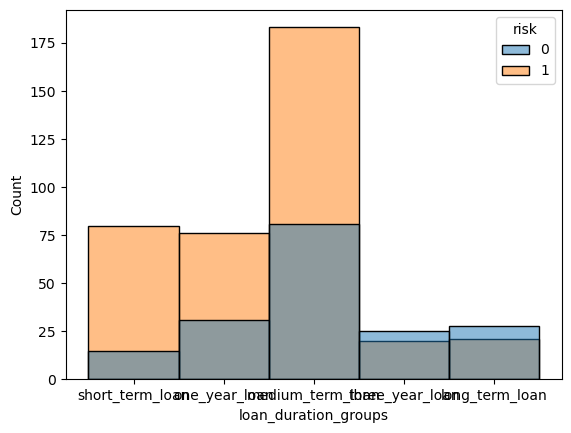

In [67]:
ge.peek_at_risk(train)

## What we saw with our features is that many feel really all over the place. Do our base features have statistically significant relationships with our target 'risk'?

In [91]:
cat_var_list = ['housing', 'saving accounts', 'checking account', 'job', 'age_groups', 'loan_duration_groups']
categorical_variable_df = ge.chi2_categorical_test(train, 'risk', cat_var_list)
categorical_variable_df

,Potential_Feature,Chi2_stat,P-Value,Significance,Keep
0,housing,12.581,0.002,0.998,Yes
1,saving accounts,13.723,0.008,0.992,Yes
2,checking account,54.861,0.000,1.000,Yes
4,age_groups,10.992,0.012,0.988,Yes
5,loan_duration_groups,37.750,0.000,1.000,Yes
3,job,3.375,0.337,0.663,No


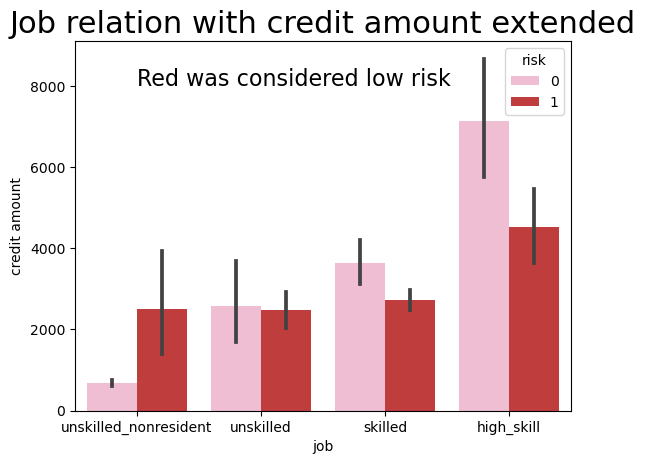

In [94]:
ge.job_credit_relationship(train)

## Thinking about this, we can see that there appears to be a relationship between jobs and how much credit an applicant had already acrued. This, then, appears to also show a relationship with how risky a loan is viewed by the bank

- take away, we probably have a multicollinearity problem with credit amount and job
- that said, I did keep job in my first models because it appears there is something that the algorithm can learn from that information

## Next, a look at another important variable I wanted to show: Duration

#### I split it into groups and I think that when we examine those groups we can see that indeed, they have different characteristics regarding whether banks thought they were more or less risky

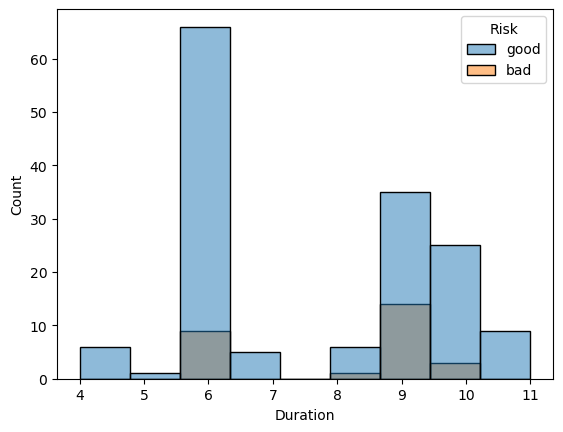

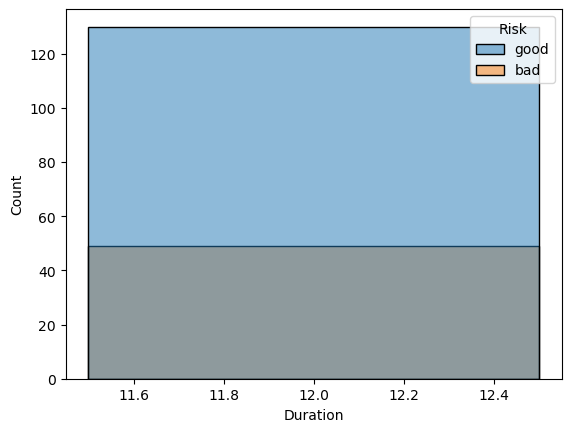

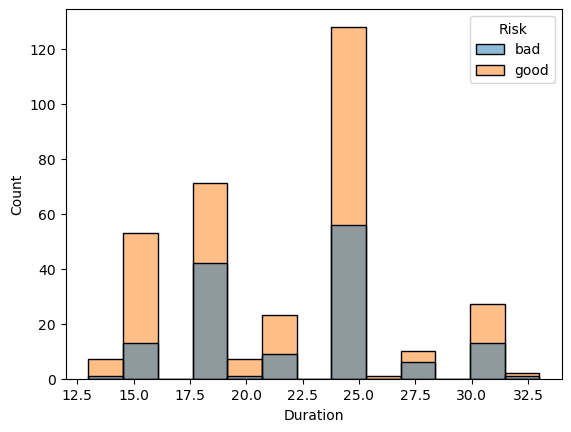

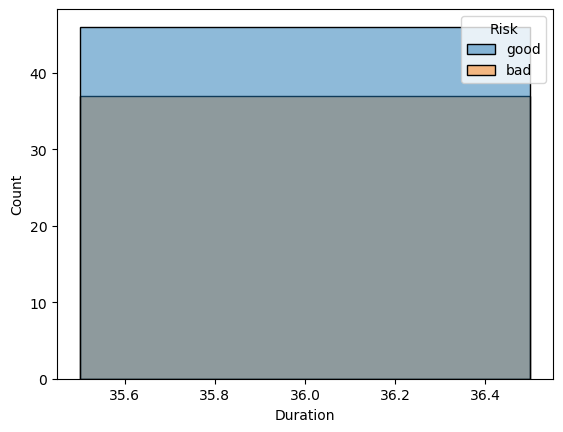

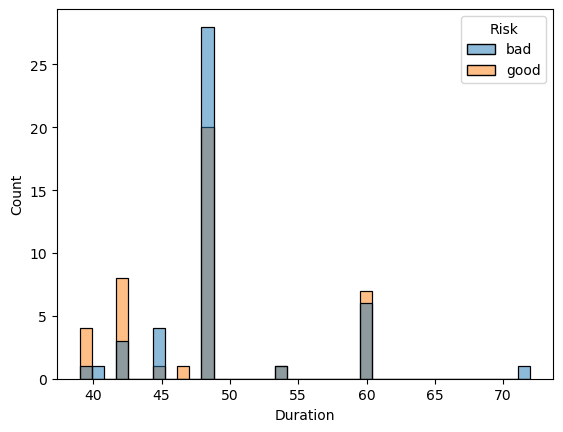

In [98]:
ge.plot_duration(df)

<h1 style="color:#900C3F;">Modelling</h1>

- We will be looking at our baseline prediction and seeking to beat it.
- I built a knn model, a random forest model, and then a gradient boosting model

In [99]:
ge.baseline(train, 'risk')

0.6785714285714286

## Our baseline is about 68%

# A friendly neighbor found a monster near a random forest

In [72]:
performance_df = gm.get_models(x_train, y_train, x_validate, y_validate)
performance_df.sort_values(by ='accuracy', ascending = False)

,model,accuracy,f1_score,precision,recall
0,gradient_booster,1.000,1.000,1.000,1.000
0,gb_validate,1.000,1.000,1.000,1.000
0,random_forest,0.771,0.861,0.763,0.988
0,rf_validate,0.767,0.849,0.755,0.969
0,knn,0.727,0.833,0.740,0.953
0,knn_validate,0.700,0.805,0.716,0.920


## What do we see here?
- Before we discuss the overfitting monster (gradient boosting ensemble), we see that our models perform pretty well
- the knn model's accuracy is better by about 2 percentage points or an 2.9% improvement over baseline
- the random forest's accuracy is better by about 8 percentage points or an 12.7% improvement over baseline

### Now the gradient booster overfitting monster
- it was always accurate. I tuned it to not be very sensitive and it was similarly accurate. It can be tuned to be more accurate, but the size of the sample plays an important role in how accurate it can be - given computational power. I decided that for this purpose, it is the best algorithm for our model 

In [73]:
gb_y_preds_test= gm.gradient_booster_model(x_test, y_test)
final_model = gm.evaluate_classification_model('gradient_booster_test', y_test, gb_y_preds_test, df=True, full=True)
final_model

,model,accuracy,f1_score,precision,recall,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate
0,gradient_booster_test,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000


<h1 style="color:#900C3F;">Conclusions</h1>


- First, this sample is small with 1000 observations
- Secondly, this sample is historical in nature. It will not be updated

#### With these features, we have the luxury to expend as many cpu cycles as we want to predict our model. 

## What do we want to do with this project? 

#### I suggest that this kind of modelling can be used to evaluate biases in creditors. Why would bank A consider loan applicant 1 a certain way when he has features in common with applicant 2, though applicant 2 was given different loan offers? We can thoroughly examine the characteristics of the applicants and see how they actually differ to spot the biases which may exist in the practices or algorithms of lenders.

#### My major concern is that gradient boosting ensemble overfits on a set of data to the point that if given enough time and computing power, it will fit to the data exactly. In this instance, with a couple of hundred observations, it took less than a second to run the model. With several thousand, it might require a couple of minutes. Once our sample gets to tens of thousands or hundreds of thousands, a bigger computer will need to be used and it may take a while to get results but it will fit the data **exactly**